In [2]:
import cv2
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

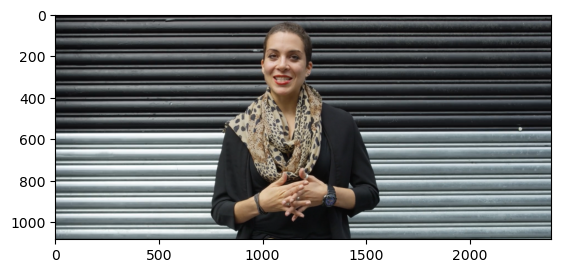

In [10]:
image_path = 'predict/Demo 2.png'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=2.1, minNeighbors=5)
    
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    i=0
    for i, (x, y, w, h) in enumerate(faces):
        face_image = image[y:y+h, x:x+w]
        face_image = cv2.resize(face_image, dsize=(192, 192)) 
        save_path = os.path.join("predict/face"+str(i+1)+".jpg") 
        cv2.imwrite(save_path, face_image)
        print(f"Face cropped and saved")

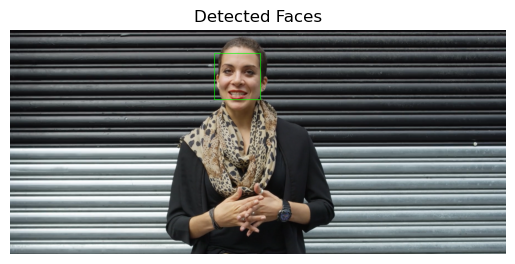

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Faces')
plt.show()

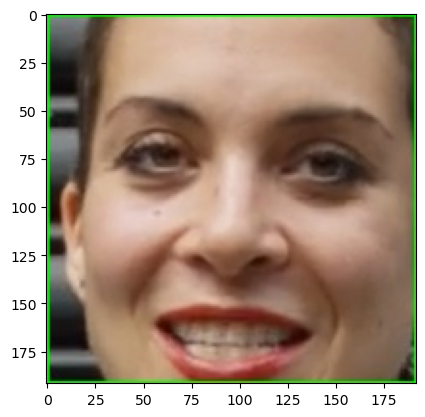

In [13]:
image_path = "predict/face1.jpg"
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [14]:
model = YOLO('predict/best.pt')
results = model('predict/face1.jpg')

YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 C:\Users\joshi\OneDrive\Desktop\DeepFake\predict\face1.jpg: 192x192 Real 0.99, Fake 0.01, 34.0ms
Speed: 4.0ms preprocess, 34.0ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 192)


In [15]:
results[0].names

{0: 'Fake', 1: 'Real'}

In [16]:
if(results[0].probs.data[0] > results[0].probs.data[1]):
    print('Prediction: Image is a DeepFake')
else:
    print('Prediction: Image is a Original')

Prediction: Image is a Original
